In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MinMaxScaler
import os
from pathlib import Path
import matplotlib.pyplot as plt




In [ ]:
#LDA giusto
feature_space = torch.load("/workspaces/dbm25/data/extracted_features.pt")

feature_type = "layer3"
k = 5  # Numero di topic/semantiche latenti

X = []  # Feature vector per ogni immagine
image_ids = []

for element in feature_space:
    if feature_type in element:
        X.append(element[feature_type])
        path = element['file_path']
        img_id = os.path.basename(path)
        image_ids.append(img_id)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


lda = LatentDirichletAllocation(n_components=k, random_state=0)
X_lda = lda.fit_transform(X_scaled)  

top_k_semantics = X_lda.T 

for i, semantic in enumerate(top_k_semantics):
    print(f"\nLatent Semantic {i + 1}  vector:\n")
    print(semantic.tolist())  
    print("-" * 40)

#TO DO : SALVARE PER OGNI IMG IL PESO DATO DALLA SEMANTICA LATENTE



Latent Semantic 1  vector:

[0.444327571835563, 0.35454865240360295, 0.24650299792925465, 0.2939806248721041, 0.0006519998152482291, 0.4609008998198641, 0.44400832346442154, 0.4752331879931113, 0.17597971262918805, 0.0006895560357616858, 0.07344180125065522, 0.3230293400655115, 0.0006825604741706867, 0.41595007286360164, 0.0006495913996956655, 0.0006409742304596662, 0.265119149024792, 0.0006594936187182574, 0.5023833956818242, 0.3938930983577826, 0.5138023224135947, 0.25087768018628925, 0.0006380786867709507, 0.6197561483856855, 0.0007052282475233255, 0.35194430203996047, 0.0006605477963143627, 0.5000289435400017, 0.3725609746317112, 0.2533296165577146, 0.5464120604446833, 0.4967366702511902, 0.370877114993738, 0.0006692155177030144, 0.2562515231282533, 0.0006372980642334481, 0.0006905890238417421, 0.15835675584139702, 0.5912392846866966, 0.4535058708813341, 0.31969977816361306, 0.3694053343980908, 0.5040914092716177, 0.31962103616483395, 0.18689578347322344, 0.0006662594084440072, 0.

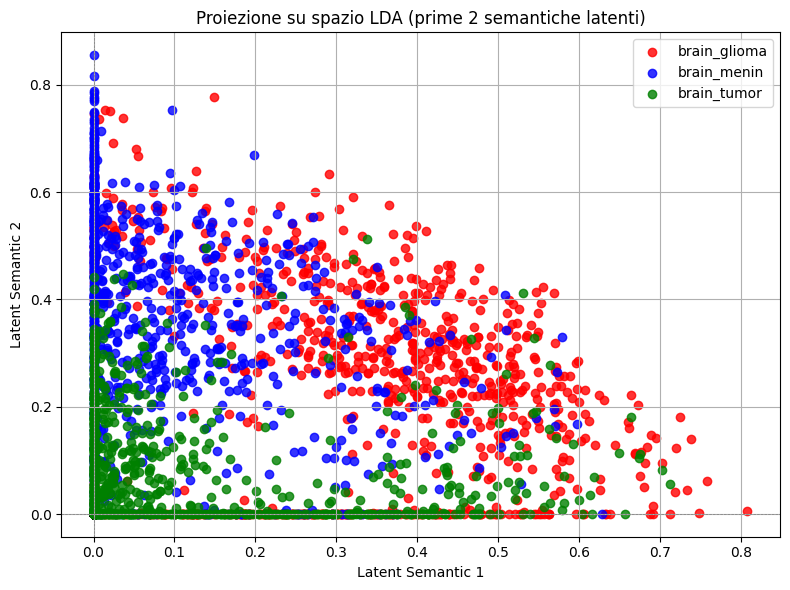

In [31]:

y_np = np.array(y)

colors = ['red', 'blue', 'green']
labels = ['brain_glioma', 'brain_menin', 'brain_tumor']

plt.figure(figsize=(8, 6))


for class_id in np.unique(y_np):
    idx = y_np == class_id
    plt.scatter(X_lda[idx, 0], 
                X_lda[idx, 1] if X_lda.shape[1] > 1 else np.zeros_like(X_lda[idx, 0]),
                label=labels[class_id], 
                color=colors[class_id], 
                alpha=0.8)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Proiezione su spazio LDA (prime 2 semantiche latenti)")
plt.xlabel("Latent Semantic 1")
if X_lda.shape[1] > 1:
    plt.ylabel("Latent Semantic 2")
else:
    plt.ylabel("")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
